# Linear Regression


$$\begin{align*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
\end{align*}$$

A weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

Vectorized form
$$
\begin{align*}
\hat{y} = h_\theta(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x}
\end{align*}
$$

- $\mathbf{\theta}$: model's parameter vector, containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
- $\mathbf{x}$ is the instance's feature vector. containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\mathbf{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0+\theta_1x_1+\theta_2x_2 \dots +\theta_nx_n $
- $h_0$: hypothesis function.

In order to train a Linear Regression model, we need a measure of how well the model fits the training data. In practice, it is simpler to minimiye the Mean Square Error (MSE) than the Root Mean Square Error (RMSE).

$$
\begin{align*}
MSE(\mathbf{X}, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}\left(\mathbf{\theta^T}\mathbf{x}^{(i)}-y^{(i)}\right)^2
\end{align*}
$$


## The Normal Equation

There is a mathematical equation that gives the result directly.

$$\begin{align*}
\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}
$$

How we can calculate the normal equation:

$$\begin{aligned}
J_\theta &= (X\theta-y)^T(X\theta-y) \\
\frac{\partial{J_\theta}}{\partial(\theta)} &= \frac{\partial}{\partial{\theta}}((X\theta-y)^T(X\theta-y)) \\
&=2X^TX\theta - 2X^Ty \\
Cost'(\theta) &= 0 \\ 
2X^TX\theta - 2X\theta^Ty &= 0 \\
2X^TX\theta &= 2X^Ty \\
(X^TX)^{-1}(X^TX)\theta &= (X^TX)^{-1}(X^Ty) \\
\theta &= (X^TX)^{-1}(X^Ty)
\end{aligned}$$


Let's test this normal equation

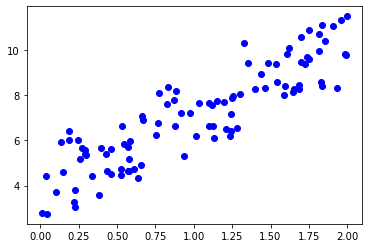

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "bo")

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.84563817],
       [3.22768332]])

In [15]:
np.ones((2, 1))

array([[1.],
       [1.]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

array([[1., 0.],
       [1., 2.]])

In [19]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84563817],
       [10.30100482]])

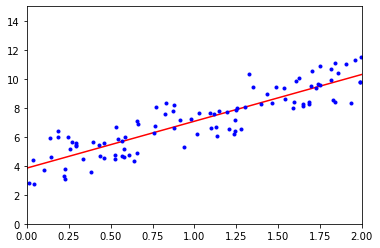

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.84563817]), array([[3.22768332]]))

In [24]:
lin_reg.predict(X_new)

array([[ 3.84563817],
       [10.30100482]])

The LinearRegression class is based on the scipy.linalg.lstsq() function.

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84563817],
       [3.22768332]])

This function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X.

In [27]:
np.linalg.pinv(X_b).dot(y)

array([[3.84563817],
       [3.22768332]])

## Computational Complexity

The computational complexity of inverting $X^TX$ is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. 

Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

## Gradient Descent

You start by filling $\theta$ with random values. Then you improve it gradually, takinig on bay step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum.

The MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. It is also a continous function with a slope that never changes abruptly. Gradient Descent is guaranteed to approach arbitrarily close the global minimum.

Notice: When using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.